# EDOs de Primeira Ordem

Para mais informações, consultar a referência:

- Mark Newman: Computational Physics

## 1. Método de Euler

Text(0, 0.5, '$x$')

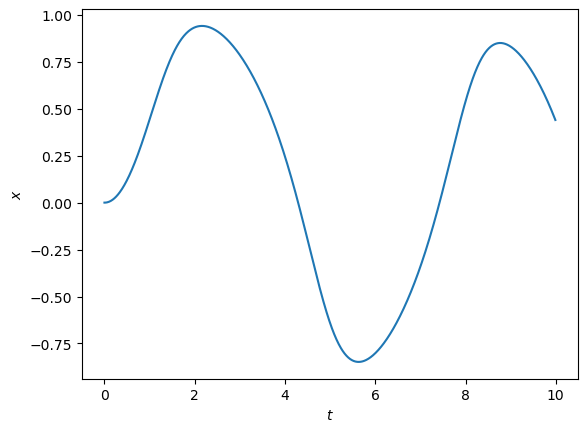

In [1]:
import numpy as np
import matplotlib.pyplot as plt


def f(x,t):
    return -x**3 + np.sin(t)

#Intervalo [a,b]:
a=0 
b=10 
#Número de pontos:
N=1000
#Delta:
h=(b-a)/N
#X inicial:
x=0

tp = np.arange(a,b,h)
xp = np.zeros(len(tp))

#Método de Euler
for i in range(N):
    xp[i] = x
    x += h*f(x,tp[i])
    
plt.plot(tp,xp)
plt.xlabel(r'$t$')
plt.ylabel(r'$x$')

## 2. Runge-Kutta 2ª Ordem

Text(0, 0.5, 'x')

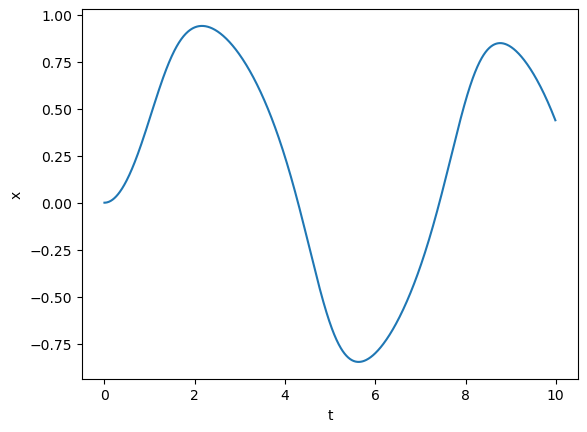

In [2]:
import numpy as np
import matplotlib.pyplot as plt


def f(x,t):
    return -x**3 + np.sin(t)

#Intervalo [a,b]:
a=0 
b=10 
#Número de pontos:
N=1000
#Delta:
h=(b-a)/N
#X inicial:
x=0

tp = np.arange(a,b,h)
xp = np.zeros(len(tp))


for i in range(N):
    k1 = h*f(x,tp[i])
    k2 = h*f(x+0.5*k1,tp[i] + 0.5*h)
    xp[i] = x
    x += k2
    
plt.plot(tp,xp)
plt.xlabel('t')
plt.ylabel('x')

## 3. Runge-Kutta 4ª Ordem


Text(0, 0.5, 'x')

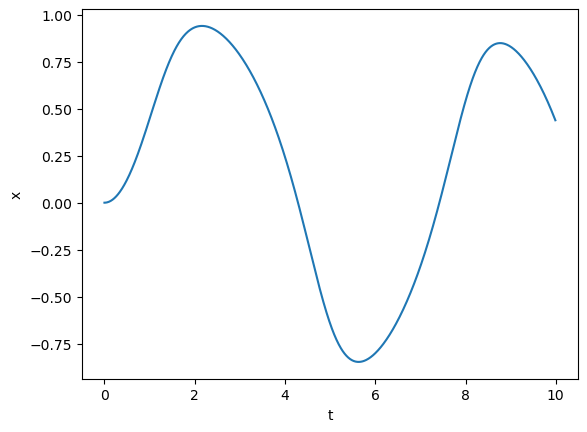

In [3]:
import numpy as np
import matplotlib.pyplot as plt


def f(x,t):
    return -x**3 + np.sin(t)

#Intervalo [a,b]:
a=0 
b=10 
#Número de pontos:
N=1000
#Delta:
h=(b-a)/N
#X inicial:
x=0

tp = np.arange(a,b,h)
xp = np.zeros(len(tp))


for i in range(N):
    k1 = h*f(x,tp[i])
    k2 = h*f(x+0.5*k1,tp[i] + 0.5*h)
    k3 = h*f(x+0.5*k2,tp[i] + 0.5*h)
    k4 = h*f(x+k3,tp[i]+h)
    xp[i] = x
    x += (k1+2*k2+2*k3+k4)/6
    
plt.plot(tp,xp)
plt.xlabel('t')
plt.ylabel('x')

## Exemplo: Filtro RC

Text(0, 0.5, 'V')

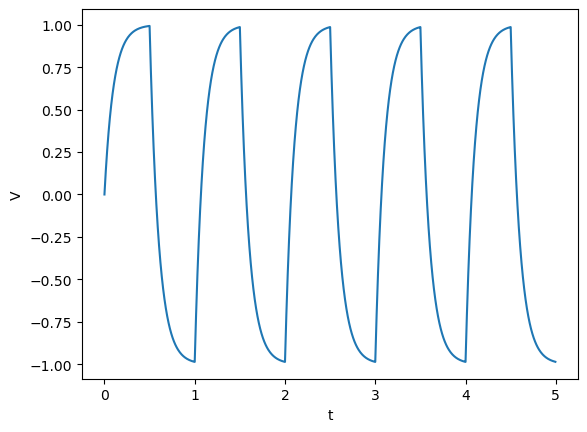

In [4]:
import numpy as np
import matplotlib.pyplot as plt


def f(Vout,Vin,t):
    return (Vin - Vout)/0.1

#Intervalo [a,b]:
a=0 
b=5
#Número de pontos:
N=1000
#Delta:
h=(b-a)/N
#X inicial:
Vout=0

tp = np.arange(a,b,h)
Vout_p = np.zeros(len(tp))
Vout_p[0] = 0


for i in range(N):
    if int(2*tp[i])%2 == 0:
        Vin = 1
    else:
        Vin = -1
        
    k1 = h*f(Vout,Vin,tp[i])
    k2 = h*f(Vout+0.5*k1,Vin,tp[i] + 0.5*h)
    k3 = h*f(Vout+0.5*k2,Vin,tp[i] + 0.5*h)
    k4 = h*f(Vout+k3,Vin,tp[i]+h)
    Vout_p[i] = Vout
    Vout += (k1+2*k2+2*k3+k4)/6
    #print(int(2*tp[i]))
    #print(Vin)
plt.plot(tp,Vout_p)
plt.xlabel('t')
plt.ylabel('V')

## 4. EDOs com várias variáveis


Equações acopladas

$$
\frac{dx}{dt} = xy - x
$$

$$
\frac{dy}{dt} = y - xy + sen^2 (\omega t)
$$

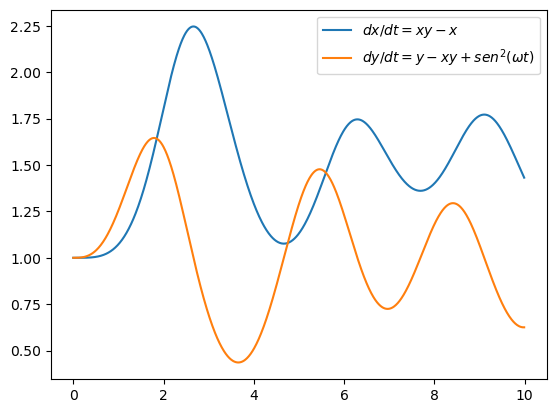

In [5]:
import numpy as np

def f(r,t):
    omega = 1
    x = r[0]
    y = r[1]
    fx = x*y - x
    fy = y - x*y + np.sin(omega*t)**2
    return np.array([fx,fy])


#t0 e tfinal
a = 0
b = 10

#Número de pontos:
N=1000
#Delta:
h=(b-a)/N

tp = np.arange(a,b,h)
xp = np.zeros(N)
yp = np.zeros(N)
r = np.array([1.,1.]) #inclui x e y iniciais

for i in range(N):
    xp[i] = r[0]
    yp[i] = r[1]
    k1 = h*f(r,tp[i])
    k2 = h*f(r+0.5*k1,tp[i] + 0.5*h)
    k3 = h*f(r+0.5*k2,tp[i] + 0.5*h)
    k4 = h*f(r+k3,tp[i]+h)
    r += (k1+2*k2+2*k3+k4)/6

plt.figure()
plt.plot(tp,xp,label=r'$dx/dt = xy - x$')
plt.plot(tp,yp,label='$dy/dt = y - xy + sen^2 (\omega t)$')
plt.legend(loc='best')